## Приложение 2. Демонстрация работы программы

### Часть 1. Генератор ключей

In [1]:
# Сначала очистим директорию от артифактов предыдущих запусков кода

!rm -f encrypted.* decrypted.* *.public *.secret
!ls -l

total 432
-rw-r--r-- 1 evgeny evgeny   5625 Apr 24 12:54 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny  77738 Apr 24 12:58 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 287142 Apr 23 17:18 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4222 Apr 24 12:50 keygen.py
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 24 12:51 __pycache__
-rw-r--r-- 1 evgeny evgeny   5160 Apr 23 16:57 rsa.py
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18 venv


In [2]:
# Запускаем генерацию ключевой пары
# Скрипт по-умолчанию создаёт пару ключей с названиями "key.pub" 
# и "key.secret", или можно напрямую передать скрипту префикс и 
# получить пару ключей с другими названиями

# Генератор ключевой пары принимает два парметра p_size и q_size
# Чтобы соблюсти условие значительной величины их разницы - 
# задам им разную длину

from keygen import KeyGenerator

KeyGenerator(1024, 3072)

# Проверим создались ли файлы с ключами
!ls -l

total 440
-rw-r--r-- 1 evgeny evgeny   5625 Apr 24 12:54 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny  77738 Apr 24 12:58 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 287142 Apr 23 17:18 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4222 Apr 24 12:50 keygen.py
-rw-r--r-- 1 evgeny evgeny   1541 Apr 24 12:59 key.public
-rw-r--r-- 1 evgeny evgeny   2052 Apr 24 12:59 key.secret
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 24 12:51 __pycache__
-rw-r--r-- 1 evgeny evgeny   5160 Apr 23 16:57 rsa.py
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18 venv


In [3]:
# Посмотрим содержимое key.pub
# Файл содержит строки в 16-м формате со значением 
# e (открытый ключ) и n (модуль) разделенные знаком /

!cat key.pub

cat: key.pub: No such file or directory


In [4]:
# Посторим файл key.secret
# Файл содержит строки в 16-м формате со значением 
# d (закрытый ключ) и n (модуль) разделенные знаком /

!cat key.secret

0X6A5012202ADF59A73555C62AC3B8819D1785D0D38EA55C25DFE9574C46994F6B26EE54A3080BF693E730064BBD62FFAC531D772754BF316A943C61A2A595BD74570F6EC0A160D58A7F760C3E50668499B2F1E0FB86EE7395715E2B8B095DED81216EC4314CBFD68BC73A67B7C958F1A2630958A7397E90A4BDA2D6691C31DBD47B85C8C842090BA1BB075913EBA3257A1E05A5555AF4733090C487CBB03F148E613CCEB3D0F887043BC284AEA294F7300068FEB64B760C46CAA51E2136C562EB3B2101B89427574F840131A14DC0106EB00D90B0EFD9FB09571F2A5CAF9F4616C77CCAE95F7679A1A146B5FE54CEBBFC5B21315CF21CC8C906A15513B9E0DD51A7CF9425A3BF16AFBDC16B85F07B97CDFB5D335F9129F0E0A2EF6CA23368B758E2277A02718669078A709AFC30B41F506B3BD2A45EAB78A215126E79DCB93040FF6E280668FF05957AE9D9F447EFA25AE57B389291CDB09200652635D590932099056606A993EAC6F27F93662A7969D8A03E0136C55CC641010160A7AD10135D1A4BDFBD06255AD47A88A0CC9B23C91657EBDAD4DD3B165A4574A02C07AE72F5EFF712C238991945B15E70E2D80EA14E4D258027511A73D21A1D7F00C1E043A16C01A5114E3981FE386C77CE18CC64E40162D7624BEA133740AF6C0527742487281691F69652C25A04817CAA342CD2AF6A8B1E

In [5]:
# Создам объект класса RSA для шифрования файлов и 
# передам ему ключ для шифрования (открытый)

from rsa import RSA

encryptor = RSA(public_key_path="key.public")
encryptor

In [6]:
# Для наглядности вывожу в строчном представлении 
# модели и её основные параметры. Видим что объект 
# класса обладает только ключами для зашифрования

encryptor.__str__()

{'public_key': '0XC34EEB2B3119B8347E3408716F557B9A51C2EA60642AA81CC02A81892961BA8F2160DABDF7DC504D8EDF3450AB5D1A2C2B3F1309F989C37FAEAF9697440581BFC3CB1ACCB18B482999ABEB3D7808A5BB873EE51D80BA8E023FB9B4AE83759CB1611DF21BD02924DFF5A8384140B48D1EDEFC408DCA2FDE3330A90E1027340083F078150B4C197BEF5C3AD9BAF86F483C2BDB796D076914C6094D9D546946DF773CDFBB82C2EB25968857045917D0773AE4E8062702D28445AEE720517A6DAAA9339FC4FEA7C6A5E7550733946152FA2B77669B8C6DFC6696F9A3E3B2692E8B8ECF0A55CF1214657B1F753C6B180458F57646FC6E48CF31CD8645810F637152AD',
 'public_key_int': 2465538569417945125834660153151664119560197793625205419427942842598400899022704004004171287101610906219269781822381968532955432684761853711607675048315699770860503961479015169256928870715326729592273395726390290893775324337426604609563176491896324077074626040700784995840272748330272468381958544997976587576511127765130433979881881507654294326269821739892781955094685923958751348715347104059362139705500829627599995211826936319699696665668596046014

In [7]:
# Создам отдельный объект для расштфрования и 
# передам ему закрытый ключ

decryptor = RSA(secret_key_path="key.secret")
decryptor

In [8]:
# Также пристально посмотрим на объект через специальный метод
# Этот объект напротив - содержит лишь ключи для расшифрования
# Таким образом можно ограничить функциональность класса просто 
# передав или не передавая ей нужные данные. 

decryptor.__str__()

{'public_key': None,
 'public_key_int': None,
 'public_key_size': None,
 'secret_key': '0X6A5012202ADF59A73555C62AC3B8819D1785D0D38EA55C25DFE9574C46994F6B26EE54A3080BF693E730064BBD62FFAC531D772754BF316A943C61A2A595BD74570F6EC0A160D58A7F760C3E50668499B2F1E0FB86EE7395715E2B8B095DED81216EC4314CBFD68BC73A67B7C958F1A2630958A7397E90A4BDA2D6691C31DBD47B85C8C842090BA1BB075913EBA3257A1E05A5555AF4733090C487CBB03F148E613CCEB3D0F887043BC284AEA294F7300068FEB64B760C46CAA51E2136C562EB3B2101B89427574F840131A14DC0106EB00D90B0EFD9FB09571F2A5CAF9F4616C77CCAE95F7679A1A146B5FE54CEBBFC5B21315CF21CC8C906A15513B9E0DD51A7CF9425A3BF16AFBDC16B85F07B97CDFB5D335F9129F0E0A2EF6CA23368B758E2277A02718669078A709AFC30B41F506B3BD2A45EAB78A215126E79DCB93040FF6E280668FF05957AE9D9F447EFA25AE57B389291CDB09200652635D590932099056606A993EAC6F27F93662A7969D8A03E0136C55CC641010160A7AD10135D1A4BDFBD06255AD47A88A0CC9B23C91657EBDAD4DD3B165A4574A02C07AE72F5EFF712C238991945B15E70E2D80EA14E4D258027511A73D21A1D7F00C1E043A16C01A5114E3981

In [9]:
# Хотя можно было все сделать одним объектов 
# просто передав ему оба ключа

rsa = RSA(public_key_path="key.public", secret_key_path="key.secret")
rsa.__str__()

{'public_key': '0XC34EEB2B3119B8347E3408716F557B9A51C2EA60642AA81CC02A81892961BA8F2160DABDF7DC504D8EDF3450AB5D1A2C2B3F1309F989C37FAEAF9697440581BFC3CB1ACCB18B482999ABEB3D7808A5BB873EE51D80BA8E023FB9B4AE83759CB1611DF21BD02924DFF5A8384140B48D1EDEFC408DCA2FDE3330A90E1027340083F078150B4C197BEF5C3AD9BAF86F483C2BDB796D076914C6094D9D546946DF773CDFBB82C2EB25968857045917D0773AE4E8062702D28445AEE720517A6DAAA9339FC4FEA7C6A5E7550733946152FA2B77669B8C6DFC6696F9A3E3B2692E8B8ECF0A55CF1214657B1F753C6B180458F57646FC6E48CF31CD8645810F637152AD',
 'public_key_int': 2465538569417945125834660153151664119560197793625205419427942842598400899022704004004171287101610906219269781822381968532955432684761853711607675048315699770860503961479015169256928870715326729592273395726390290893775324337426604609563176491896324077074626040700784995840272748330272468381958544997976587576511127765130433979881881507654294326269821739892781955094685923958751348715347104059362139705500829627599995211826936319699696665668596046014

In [10]:
# Проверим правильность работы ключей у объектов encrypted 
# и decrypted. Сгенерируем случайное число и зашифруем а 
# затем расшифруем их

import random

_int = random.randrange(2, 100)

encr = pow(_int, encryptor.public_key_int, encryptor.module_int)
decr = pow(encr, decryptor.secret_key_int, decryptor.module_int)

bool(decr == _int)

True

In [11]:
# Проделаем то же самое с объектом rsa чтобы подтвердить 
# корректность суждений

_int = random.randrange(2, 100)

encr = pow(_int, rsa.public_key_int, rsa.module_int)
decr = pow(encr, rsa.secret_key_int, rsa.module_int)

bool(decr == _int)

True

### Часть 2. Зашифрование и расширование

In [12]:
# Для демонстрации зашифрования и расшифрования мною были 
# подготовлены два файла с тескстом open.txt и изображением 
# image.png

# Передам методу encrypt относительный путь к файлу для 
# зашифрования и название файлы куда дб записан зашифрованый 
# файл encrypted.txt

rsa.encrypt("open.txt", "encrypted.txt")

In [13]:
# Попробуем прочитать зашифрованый файл

!cat encrypted.txt

6U�2)��f�ɾpx���U�XBw/�.G�pM�f4�3�vCg�JB�X�5������:2�R�>�1�h"���c<
�����v�O
�-�5_���Z�-]J��v8��K�����OBqI����8��05�U�}������\%R���=Ͳ!���Ͼr���8��4�飶�������47�JTZeX�H�}�m�I��s.�́�y�q��wrаy%ݦe%p���X?�9c7y�'Ol��uŖh�4
ʿx���m-�V�D�����c���:�!��a6<
�����>�I������q~�y6��*���dS�5�pýk@� �alYԒ�5�V�Ng;Z:��;#	��+�:���/</��!��w�+%s�F�<J�c���jG�*����>&��w�֕���a�[76ڹq(A&

In [14]:
# Передам методу decrypt относительный путь к файлу для 
# расшифрования и название файлы куда дб записан расшифрованый 
# файл decrypted.txt

rsa.decrypt("encrypted.txt", "decrypted.txt")

In [15]:
!cat decrypted.txt

Прощай немытая Россия,
Страна рабов, страна господ,
И вы, мундиры голубые,
И ты, им преданный народ.

Быть может, за стеной Кавказа
Сокроюсь от твоих пашей,
От их всевидящего глаза,
От их всеслышащих ушей.

Михаил Лермонтов, 1841г.

In [16]:
# Проверим корректность расшифровки

with open("open.txt", "rb") as file:
    open_text = file.read()

with open("decrypted.txt", "rb") as file:
    decrypted_text = file.read()

bool(open_text == decrypted_text)

True

In [17]:
# Установлю библиотеку для просмотра изображений

!pip3 install pillow


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [18]:
# Зашифрую изображение и сохраню в файл encrypted.png

rsa.encrypt("image.png", "encrypted.png")
!ls -l

total 484
-rw-r--r-- 1 evgeny evgeny   5625 Apr 24 12:54 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny    408 Apr 24 12:59 decrypted.txt
-rw-r--r-- 1 evgeny evgeny  77738 Apr 24 12:58 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 287142 Apr 23 17:18 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35328 Apr 24 13:00 encrypted.png
-rw-r--r-- 1 evgeny evgeny    512 Apr 24 12:59 encrypted.txt
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4222 Apr 24 12:50 keygen.py
-rw-r--r-- 1 evgeny evgeny   1541 Apr 24 12:59 key.public
-rw-r--r-- 1 evgeny evgeny   2052 Apr 24 12:59 key.secret
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 24 12:51 __pycache__
-rw-r--r-- 1 evgeny evgeny   5160 Apr 23 16:57 rsa.py
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18 venv


In [19]:
# Попробую открыть файл

from PIL import Image

try:
    Image.open("encrypted.png")
except:
    print("Невозможно прочитать файл!")

Невозможно прочитать файл!


In [20]:
# Расшифрую изображение и сохраню в файл decrypted.png

rsa.decrypt("encrypted.png", "decrypted.png")
!ls -l

total 520
-rw-r--r-- 1 evgeny evgeny   5625 Apr 24 12:54 analyze.ipynb
-rw-r--r-- 1 evgeny evgeny  35117 Apr 24 13:00 decrypted.png
-rw-r--r-- 1 evgeny evgeny    408 Apr 24 12:59 decrypted.txt
-rw-r--r-- 1 evgeny evgeny  77738 Apr 24 12:58 demo.ipynb
-rw-r--r-- 1 evgeny evgeny 287142 Apr 23 17:18 demo.pdf
-rw-r--r-- 1 evgeny evgeny  35328 Apr 24 13:00 encrypted.png
-rw-r--r-- 1 evgeny evgeny    512 Apr 24 12:59 encrypted.txt
-rw-r--r-- 1 evgeny evgeny  35117 Apr 23 16:57 image.png
-rw-r--r-- 1 evgeny evgeny   4222 Apr 24 12:50 keygen.py
-rw-r--r-- 1 evgeny evgeny   1541 Apr 24 12:59 key.public
-rw-r--r-- 1 evgeny evgeny   2052 Apr 24 12:59 key.secret
-rw-r--r-- 1 evgeny evgeny    408 Apr 20 15:36 open.txt
drwxr-xr-x 2 evgeny evgeny   4096 Apr 24 12:51 __pycache__
-rw-r--r-- 1 evgeny evgeny   5160 Apr 23 16:57 rsa.py
drwxr-xr-x 6 evgeny evgeny   4096 Apr 15 15:18 venv


In [21]:
# Проверим корректность расшифровки

with open("image.png", "rb") as file:
    source_image = file.read()

with open("decrypted.png", "rb") as file:
    decrypted_image = file.read()

bool(source_image == decrypted_image)

True

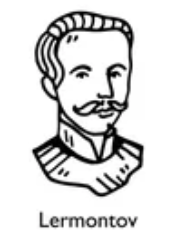

In [22]:
# Попробую открыть расшифрованый файл

Image.open("decrypted.png")

### Спасибо за внимание и да пребудет с вами сила!